# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from descartes import PolygonPatch
import pylab as pl
import os
from OSGridConverter import latlong2grid, grid2latlong

In [11]:
os.chdir('C:/Users/zacha/Documents/GitHub/plymouth-university-proj518/data')
print(os.getcwd())

C:\Users\zacha\Documents\GitHub\plymouth-university-proj518\data


# UK east coast velocity potential .995 sigma

In [ ]:
file = 'UK east coast velocity potential .995 sigma.csv'
df = pd.read_csv(file, sep=',')

lat_min, lat_max = min(df['Lat']), max(df['Lat'])
lon_min, lon_max = min(df['Lon']), max(df['Lon'])

east_coast_lat_min, east_coast_lat_max = lat_min, lat_max
east_coast_lon_min, east_coast_lon_max = lon_min, lon_max

In [ ]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)
map = ax.scatter(df['Lon'], df['Lat'], c=df['Chi'], cmap='viridis')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')
plt.show()

In [ ]:
mp = Basemap(llcrnrlat=lat_min-2, llcrnrlon=lon_min-3, urcrnrlat=lat_max+2, urcrnrlon=lon_max+3)

fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Chi'], cmap='viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')

plt.show()

In [ ]:
mp = Basemap(llcrnrlat=lat_min-1, llcrnrlon=lon_min-0.5, urcrnrlat=lat_max+1, urcrnrlon=lon_max+0.5)

fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Chi'], cmap='viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Chi')

plt.show()

# admiralty bathymetry UK east coast

In [4]:
file = 'admiralty bathymetry UK east coast.csv'
df = pd.read_csv(file, sep=',')

lat_min, lat_max = min(df['Lat']), max(df['Lat'])
lon_min, lon_max = min(df['Lon']), max(df['Lon'])


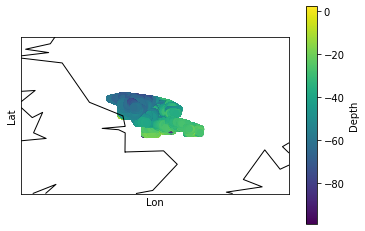

In [5]:
mp = Basemap(llcrnrlat=lat_min-2, llcrnrlon=lon_min-3, urcrnrlat=lat_max+2, urcrnrlon=lon_max+3)

fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

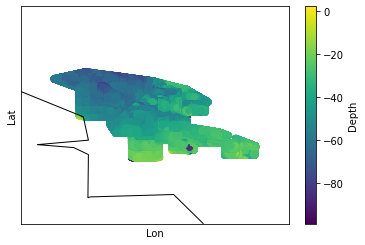

In [6]:
mp = Basemap(llcrnrlat=lat_min-1, llcrnrlon=lon_min-0.5, urcrnrlat=lat_max+1, urcrnrlon=lon_max+0.5)

fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

## Search space outline

In [12]:
file = 'admiralty bathymetry UK east coast.csv'
df = pd.read_csv(file, sep=',')

# load UK east coast edge points alpha 17.5.csv
edges = pd.read_csv('UK east coast edge points alpha 17.5.csv')
polygon_np = edges.to_numpy()

poly = Polygon(polygon_np)

# plot Lat and Long colored by Depth
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# name figure
fig.suptitle('UK North Sea search space', fontsize=20)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')

patch = PolygonPatch(poly, fc='#999999', ec='#000000', fill=False)
ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'admiralty bathymetry UK east coast.csv'

## Relief map of >40m depth

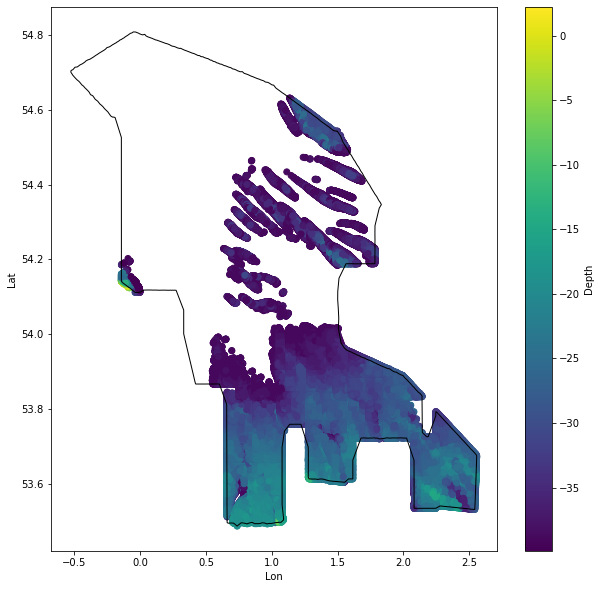

In [6]:
file = 'admiralty bathymetry UK east coast.csv'
df = pd.read_csv(file, sep=',')

# filter bathymetry points so depth is >40m
df = df[df['Depth'] > -40]

# load UK east coast edge points alpha 17.5.csv
edges = pd.read_csv('UK east coast edge points alpha 17.5.csv')
polygon_np = edges.to_numpy()

poly = Polygon(polygon_np)

# plot Lat and Long colored by Depth
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# name figure
fig.suptitle('UK North Sea search space, depth > -40m', fontsize=20)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')

patch = PolygonPatch(poly, fc='#999999', ec='#000000', fill=False)
ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')
plt.show()

Combined plots

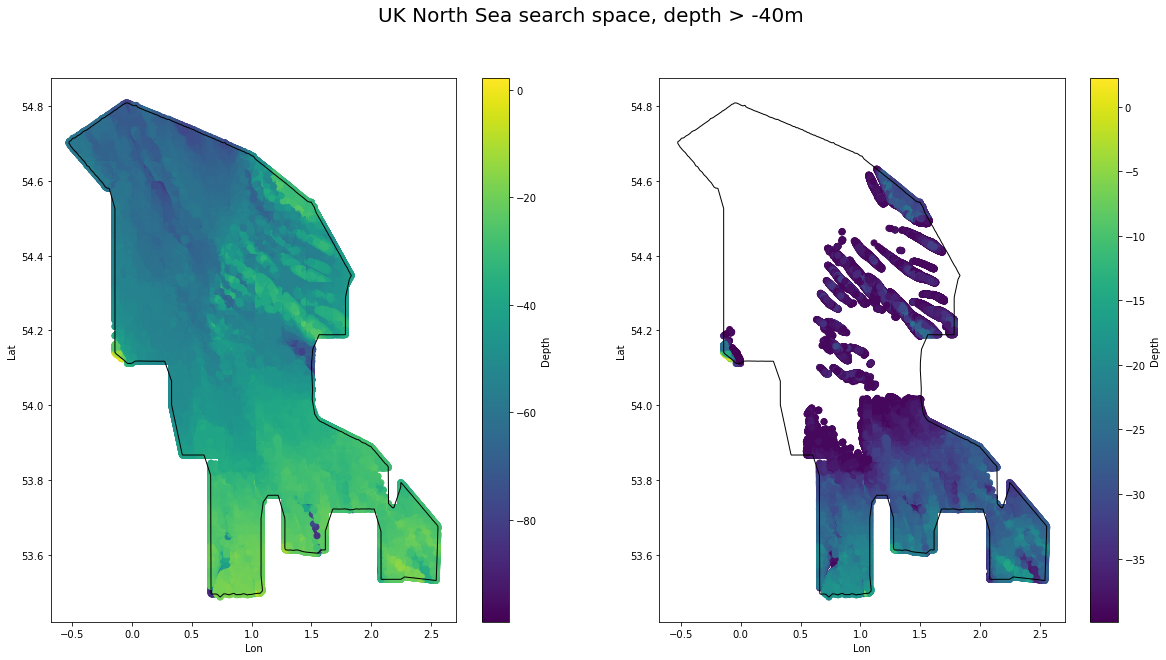

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# load UK east coast edge points alpha 17.5.csv
edges = pd.read_csv('UK east coast edge points alpha 17.5.csv')
polygon_np = edges.to_numpy()
poly = Polygon(polygon_np)

file = 'UKHO ADMIRALTY bathymetry UK east coast.csv'
df = pd.read_csv(file, sep=',')

# filter bathymetry points so depth is >40m
viable_df = df[df['Depth'] > -40]

# plot Lat and Long colored by Depth
ax = axes[0]

# name figure
fig.suptitle('UK North Sea search space', fontsize=20)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')

patch = PolygonPatch(poly, fc='#999999', ec='#000000', fill=False)
ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

# plot Lat and Long colored by Depth
ax = axes[1]

# name figure
fig.suptitle('UK North Sea search space, depth > -40m', fontsize=20)

map = ax.scatter(viable_df['Lon'], viable_df['Lat'], c=viable_df['Depth'], cmap='viridis')

patch = PolygonPatch(poly, fc='#999999', ec='#000000', fill=False)
ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

# january 2020 velocity potential .995 sigma

In [ ]:
file = 'january 2020 velocity potential .995 sigma.nc'
data = Dataset(file, mode='r')

lat = data.variables['lat'][:]
lon = data.variables['lon'][:]-180.0
chi = data.variables['chi'][::]

longs, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D array
air = np.squeeze(chi[0,:,:])

print(f"longs shape: {longs.shape}, lats shape: {lats.shape}, chi shape: {chi.shape}")


In [ ]:
# whole map plot
mp = Basemap()

fig = plt.figure()
ax = fig.add_subplot(111)

cscheme = mp.pcolor(longs, lats, air, cmap = 'viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = mp.colorbar(cscheme,location='right',pad = '10%')
cbar.set_label('Chi')

plt.show()

In [ ]:
# constrained to area around UK east coast
mp = Basemap(llcrnrlat=east_coast_lat_min-2, llcrnrlon=east_coast_lon_min-3, urcrnrlat=east_coast_lat_max+2, urcrnrlon=east_coast_lon_max+3)

fig = plt.figure()
ax = fig.add_subplot(111)

cscheme = mp.pcolor(longs, lats, air, cmap = 'viridis')

# draw coastline from basemap
mp.drawcoastlines()

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = mp.colorbar(cscheme, location='right', pad='10%')
cbar.set_label('Chi')

plt.show()

# UK wind energy locations

In [ ]:
file = 'UK wind energy locations raw.csv'
df = pd.read_csv(file, sep=',')
points = np.array([df['LNG'], df['LAT']]).T

file = 'admiralty bathymetry UK east coast.csv'
df = pd.read_csv(file, sep=',')


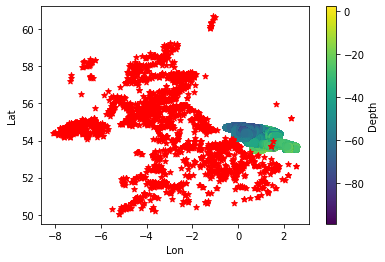

In [ ]:
# plot Lat and Long colored by Depth
fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(df['Lon'], df['Lat'], c=df['Depth'], cmap='viridis')
ax.scatter(points[:, 0], points[:, 1], c='r', marker='*')

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

## Wind energy locations within search space

In [3]:
file = 'UK wind energy locations.csv'
df = pd.read_csv(file, sep=',')
points = np.array([df['LNG'], df['LAT']]).T

file = 'admiralty bathymetry UK east coast.csv'
admiralty_df = pd.read_csv(file, sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'UK wind energy locations.csv'

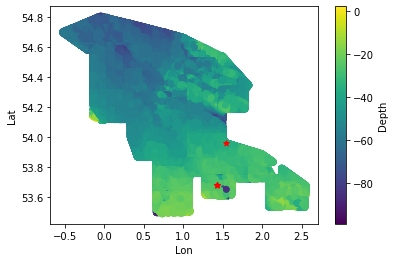

In [ ]:
# plot contrained to search space
fig = plt.figure()
ax = fig.add_subplot(111)

map = ax.scatter(admiralty_df['Lon'], admiralty_df['Lat'], c=admiralty_df['Depth'], cmap='viridis')
ax.scatter(points[:, 0], points[:, 1], c='r', marker='*')

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

plt.show()

## Draw perimeters using no. of turbines

Assuming `586.74m` between turbines, we can approximate turbine perimeter shape by finding area of site from no. of turbines in site, then finding square shape that will equal that area.

(Square shape as opposed to rectangle in order to generate useful shapes, not infinitely thin rectangles).

Also assume that `1° of latitude = 111.32km = 111320m`, and `1° of longitude = 40075km * cos(latitude) / 360 = 40075000m * cos(latitude) / 360`.

**Sources**
* https://energyfollower.com/wind-turbine-spacing/
* https://stackoverflow.com/a/39540339/5267623/

In [8]:
file = 'UK east coast wind energy locations.csv'
df = pd.read_csv(file, sep=',')

points = pd.DataFrame(
    columns=[
        "center_lon",
        "center_lat",
        "q1_lon",
        "q1_lat",
        "q2_lon",
        "q2_lat",
        "q3_lon",
        "q3_lat",
        "q4_lon",
        "q4_lat"
    ]
)

ranges = []

for idx, row in df.iterrows():
    lon, lat, turbnum = row['LNG'], row['LAT'], row['TURBNUM']

    grid = latlong2grid(lat, lon)
    easting, northing = grid.eastNorth()

    # square root turbnum to get number of turbines along lon / lat dimensions
    length_turbnum = np.sqrt(turbnum)

    print(turbnum)

    # length of lon / lat dimensions from 500m radius / turbine in metres
    # get offset from 500m / 2.0 for radius, then divide by 10.0 to get northing/eassting conversion to 10x10m national grid = 25.0
    eastNorth_offset = int(length_turbnum * 25.0)

    # calculate easting northings of corners
    q1_easting, q1_northing = easting - eastNorth_offset, northing + eastNorth_offset
    q2_easting, q2_northing = easting + eastNorth_offset, northing + eastNorth_offset
    q3_easting, q3_northing = easting - eastNorth_offset, northing - eastNorth_offset
    q4_easting, q4_northing = easting + eastNorth_offset, northing - eastNorth_offset

    # calculate lons and lats of corners
    q1 = grid2latlong(f'TB {str(q1_easting)[1:]} {str(q1_northing)[1:]}', tag='WGS84')
    q2 = grid2latlong(f'TB {str(q2_easting)[1:]} {str(q2_northing)[1:]}', tag='WGS84')
    q3 = grid2latlong(f'TB {str(q3_easting)[1:]} {str(q3_northing)[1:]}', tag='WGS84')
    q4 = grid2latlong(f'TB {str(q4_easting)[1:]} {str(q4_northing)[1:]}', tag='WGS84')

    q1_lon, q1_lat = q1.longitude, q1.latitude
    q2_lon, q2_lat = q2.longitude, q2.latitude
    q3_lon, q3_lat = q3.longitude, q3.latitude
    q4_lon, q4_lat = q4.longitude, q4.latitude

    q1_lon_offset = q1_lon - lon
    q1_lat_offset = q1_lat - lat
    q2_lon_offset = q2_lon - lon
    q2_lat_offset = q2_lat - lat
    q3_lon_offset = q3_lon - lon
    q3_lat_offset = q3_lat - lat
    q4_lon_offset = q4_lon - lon
    q4_lat_offset = q4_lat - lat

    ranges.append((abs(q1_lon_offset)+abs(q2_lon_offset), abs(q1_lat_offset)+abs(q3_lat_offset)))

    points.loc[len(points.index)] = [lon, lat, q1_lon, q1_lat, q2_lon, q2_lat, q3_lon, q3_lat, q4_lon, q4_lat]

# output average range
lat_range = sum([x[0] for x in ranges]) / len(ranges)
lon_range = sum([x[1] for x in ranges]) / len(ranges)

print(f"lat range: {lat_range}, lon range: {lon_range}")

231.0
180.0
165.0
174.0
lat range: 0.010353115110736666, lon range: 0.00611874675204227


Area: 0.0
Area: 0.0
Area: 0.0
Area: 0.0


/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


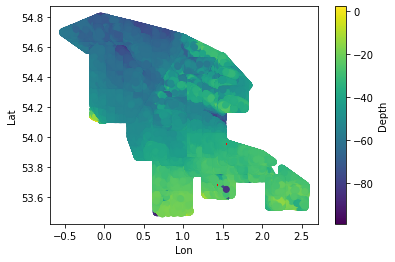

In [ ]:
# plot contrained to search space
fig = pl.figure()
ax = fig.add_subplot(111)

file = 'admiralty bathymetry UK east coast.csv'
admiralty_df = pd.read_csv(file, sep=',')
map = ax.scatter(admiralty_df['Lon'], admiralty_df['Lat'], c=admiralty_df['Depth'], cmap='viridis')

#ax.scatter(points['center_lon'], points['center_lat'], c='r', marker='*') # scatter center of locations

# construct polygons from quads
for idx, row in points.iterrows():
    q1, q2, q3, q4 = (row["q1_lon"], row["q1_lat"]), (row["q2_lon"], row["q2_lat"]), (row["q3_lon"], row["q3_lat"]), (row["q4_lon"], row["q4_lat"])

    p = np.array([q1, q2, q3, q4])

    polygon = Polygon(p)

    print(f"Area: {polygon.area * 100.0}")

    patch = PolygonPatch(polygon, fc="#FF0000", ec="#FF0000", fill=True)
    ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

pl.show()